## Analisando dados de Startups - Unicórnio


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

5.7.0


In [3]:
uni = pd.read_excel('Unicórnios.xlsx')

In [4]:
uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Company                1073 non-null   object        
 1   Valuation( Em bilhão)  1073 non-null   int64         
 2   Date Joined            1073 non-null   datetime64[ns]
 3   Industry               1073 non-null   object        
 4   City                   1057 non-null   object        
 5   Country                1073 non-null   object        
 6   Continent              1073 non-null   object        
 7   Year Founded           1073 non-null   int64         
 8   Funding(em bilhão)     1073 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 75.6+ KB


In [5]:
uni.describe()

,Valuation( Em bilhão),Year Founded,Funding(em bilhão)
count,1073.000000,1073.000000,1073.000000
mean,3.454800,2012.983225,0.551556
std,8.550992,4.926673,0.807921
min,1.000000,1979.000000,0.000000
25%,1.000000,2011.000000,0.218000
50%,2.000000,2014.000000,0.365000
75%,3.000000,2016.000000,0.603000
max,180.000000,2021.000000,14.000000


### Análise Exploratória dos Dados:

In [6]:
uni.groupby('Industry').mean().sort_values(by='Valuation( Em bilhão)', ascending = False)

# Na tabela abaixo, foi feito o agrupamento por indústria das empresas e pegou-se a média do valuation, do ano que foi 
# fundada e o funding que essa empresa recebeu
# Um destaque está no valuation de empresas de inteligência artificial e no funding de empresas relacionadas a veículos e 
# transport

,Valuation( Em bilhão),Year Founded,Funding(em bilhão)
Industry,,,
Artificial Intelligence,4.488095,2013.892857,0.557167
Other,4.344828,2011.844828,0.690414
Consumer & retail,4.240000,2010.320000,1.019680
Fintech,3.937500,2013.977679,0.482125
E-commerce & direct-to-consumer,3.837838,2012.801802,0.670604
Edtech,3.571429,2011.535714,0.781250
Data management & analytics,3.317073,2012.073171,0.438561
Travel,3.285714,2012.214286,0.901857
Auto & transportation,3.193548,2013.838710,1.131419


In [7]:
# Lista dos 5 maiores unicórnios presentes na base de dados

uni.sort_values('Valuation( Em bilhão)', ascending = False).head(5)

,Company,Valuation( Em bilhão),Date Joined,Industry,City,Country,Continent,Year Founded,Funding(em bilhão)
0,Bytedance,180,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,8.0
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0


In [19]:
# Lista dos 5 países que mais abrigam unicórnios no mundo

uni['Country'].value_counts(normalize = True).head(10)

United States     0.523765
China             0.161230
India             0.060578
United Kingdom    0.040075
Germany           0.023299
France            0.022367
Israel            0.018639
Canada            0.017707
Brazil            0.014911
Singapore         0.011184
Name: Country, dtype: float64

In [9]:
# Anos em que mais empresas se tornaram unicórnios
uni['Year Founded'].value_counts().head(5)

2015    155
2016    110
2014    109
2012     95
2013     87
Name: Year Founded, dtype: int64

In [10]:
# Lista dos unicórnios presentes no Brasil

uni[uni['Country'] =='Brazil']

,Company,Valuation( Em bilhão),Date Joined,Industry,City,Country,Continent,Year Founded,Funding(em bilhão)
141,Creditas,5,2020-12-18,Fintech,Sao Paulo,Brazil,South America,2012,0.824
142,QuintoAndar,5,2019-09-09,E-commerce & direct-to-consumer,Campinas,Brazil,South America,2012,0.755
165,C6 Bank,5,2020-12-02,Fintech,Sao Paulo,Brazil,South America,2018,2.000
263,Nuvemshop,3,2021-08-17,E-commerce & direct-to-consumer,Sao Paulo,Brazil,South America,2011,0.628
265,Wildlife Studios,3,2019-12-05,Other,Sao Paulo,Brazil,South America,2011,0.180
343,Loft,3,2020-01-03,E-commerce & direct-to-consumer,Sao Paulo,Brazil,South America,2018,0.788
457,Loggi,2,2019-06-05,"Supply chain, logistics, & delivery",Sao Paulo,Brazil,South America,2013,0.507
518,CloudWalk,2,2021-09-08,Fintech,Sao Paulo,Brazil,South America,2015,0.345
520,Olist,2,2021-12-15,E-commerce & direct-to-consumer,Curitiba,Brazil,South America,2015,0.320
606,Movile,1,2018-07-12,Mobile & telecommunications,Sao Paulo,Brazil,South America,1998,0.588


In [11]:
uni[uni['Country'] =='Brazil'].groupby('Industry').count().sort_values('Valuation( Em bilhão)', ascending = False)
# Lista ds principais industrias de atuação dos unicórnios brasileiros

,Company,Valuation( Em bilhão),Date Joined,City,Country,Continent,Year Founded,Funding(em bilhão)
Industry,,,,,,,,
E-commerce & direct-to-consumer,5,5,5,5,5,5,5,5
Fintech,5,5,5,5,5,5,5,5
"Supply chain, logistics, & delivery",3,3,3,3,3,3,3,3
Artificial Intelligence,1,1,1,1,1,1,1,1
Mobile & telecommunications,1,1,1,1,1,1,1,1
Other,1,1,1,1,1,1,1,1


In [12]:
uni[uni['Country'] =='Brazil'].sort_values('Valuation( Em bilhão)', ascending = False).head(5)
# Lista dos 5 maiores unicórnios brasileiros

,Company,Valuation( Em bilhão),Date Joined,Industry,City,Country,Continent,Year Founded,Funding(em bilhão)
141,Creditas,5,2020-12-18,Fintech,Sao Paulo,Brazil,South America,2012,0.824
142,QuintoAndar,5,2019-09-09,E-commerce & direct-to-consumer,Campinas,Brazil,South America,2012,0.755
165,C6 Bank,5,2020-12-02,Fintech,Sao Paulo,Brazil,South America,2018,2.000
263,Nuvemshop,3,2021-08-17,E-commerce & direct-to-consumer,Sao Paulo,Brazil,South America,2011,0.628
265,Wildlife Studios,3,2019-12-05,Other,Sao Paulo,Brazil,South America,2011,0.180


### Criando Visualização dos Dados


In [13]:
uni['Industry'].iplot(kind='hist',bins=25)
# O gráfico abaixo mostra como está distribuida a quantidade de unicórnios por indústria
# Deixando claro que a indústria de fintech e desenvolvimento de softwares possuem a maior quantidade de unicórnios

<AxesSubplot:>

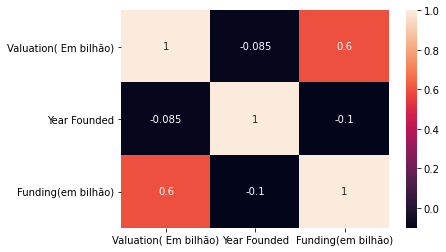

In [14]:
sns.heatmap(uni.corr(),annot = True)
# No gráfico abaixo, buscou-se entender a correlação entre diversos fatores, mas principalmente entre o funding que a 
# empresa recebeu e seu valuation final, que mostrou ter uma correlação média

<Figure size 864x216 with 0 Axes>

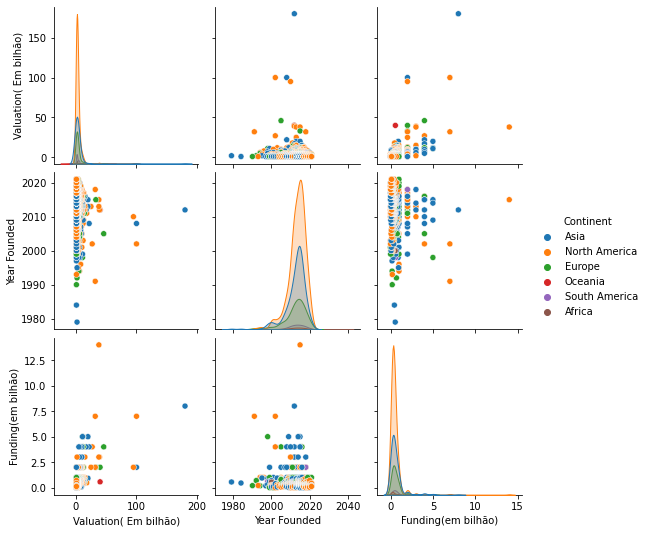

In [15]:
plt.figure(figsize=(12,3))
sns.pairplot(uni, hue = "Continent")
# Representação gráfica da relação entre os parâmetros numéricos da base de dados com uma legenda de Continente

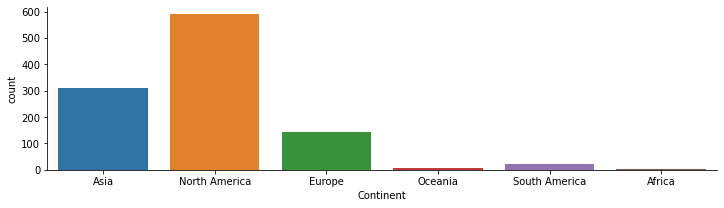

In [16]:
plt.figure(figsize=(12,3))
sns.countplot(x='Continent',data=uni)
sns.despine(right=True)
# Neste gráficos conseguimos ver como estão distribuídas por continente os unicórnios
# É notável a grande concentração de unicórnios na américa do norte 

<Figure size 1440x216 with 0 Axes>

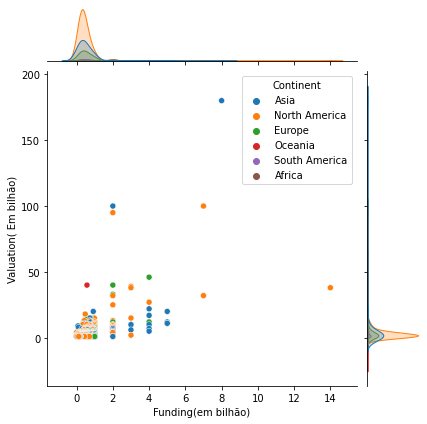

In [17]:
plt.figure(figsize=(20,3))
sns.jointplot(x='Funding(em bilhão)',y='Valuation( Em bilhão)',data=uni,kind='scatter', hue = "Continent")
# Neste gráfico podemos ver a relação entre o valor do funding que a empresa recebeu e o seu valuation, além de termos a 
# legenda por continente

In [18]:
uni.iplot(kind='bubble',x = 'Year Founded',y='Funding(em bilhão)',size='Valuation( Em bilhão)')
# Neste gráfico podemos ver a relação novamente entre funding(eixo Y) e o valuation(tamanho dos círculos) mas de uma maneira 
# um pouco mais visual e lúdica